# ROOM 1: Metadata

The purpose of this room is to explore and understand the attributes and metadata of a DICOM file when processed using the pydicom library. By working through this notebook, participants will gain insight into how to access, interpret, and manipulate key elements of the metadata stored within a DICOM object.

Please go to: `link`

to download the slices. You need to upload them in your colab environment.

# PyDicom

pydicom is a Python library specifically designed for working with DICOM files, enabling seamless interaction with medical imaging data by allowing users to read, modify, and write DICOM datasets. Beyond basic file handling, *pydicom excels in accessing and manipulating metadata*, integrating pixel data with tools like NumPy for advanced processing, and enabling tasks such as anonymization and custom transformations.

In [ ]:
!pip install pydicom #Uncomment this line if you need to install the library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.0 MB/s eta 0:00:00


# Load the necessary libraries

In [ ]:
import pydicom
import matplotlib.pyplot as plt
import pandas as pd

# Set the path to where the images are

Here, we will work with files 100, 126, 140. To do this, we need to create a upload

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1-100.dcm to 1-100.dcm
Saving 1-126.dcm to 1-126.dcm
Saving 1-140.dcm to 1-140.dcm
Saving 1-160.dcm to 1-160.dcm


In [ ]:
import os
os.makedirs("uploaded_images", exist_ok=True)

# Step 3: Save uploaded images
for filename in uploaded.keys():
    with open(os.path.join("uploaded_images", filename), "wb") as f:
        f.write(uploaded[filename])

In [ ]:
possible_slices = ["100" , "126", "140", "160"]
data_sl = {}
for sl in possible_slices:
    dicom_file_path = f"/content/1-{sl}.dcm"
    data_sl[sl] = dicom_file_path

print(data_sl)

{'100': '/content/1-100.dcm', '126': '/content/1-126.dcm', '140': '/content/1-140.dcm', '160': '/content/1-160.dcm'}


# Read the DICOM file
Read the dicom data from each of the *possible files* that we are going to use.
For this, we are going to use the *pydicom* library and the method *dcmread*

In [ ]:
dicom_sl_1 = pydicom.dcmread(data_sl['100'])
dicom_sl_2 = pydicom.dcmread(data_sl['126'])
dicom_sl_3 = pydicom.dcmread(data_sl['140'])
dicom_sl_4 = pydicom.dcmread(data_sl['160'])

# Extract the pixel array from the DICOM dataset

When working with medical images stored in the DICOM (Digital Imaging and Communications in Medicine) format, it's essential to understand how the data is organized and why extracting the pixel array is a necessary step. The DICOM file is more than just an image; it's a comprehensive dataset that includes both the image data and a wealth of metadata describing various aspects of the image and patient information.

The method *pixel_array* handles the decoding process, converting the pixel data into a usable numerical array.

In [ ]:
pixel_array_1 = dicom_sl_1.pixel_array
pixel_array_2 = dicom_sl_2.pixel_array
pixel_array_3 = dicom_sl_3.pixel_array
pixel_array_4 = dicom_sl_4.pixel_array

# For visualization

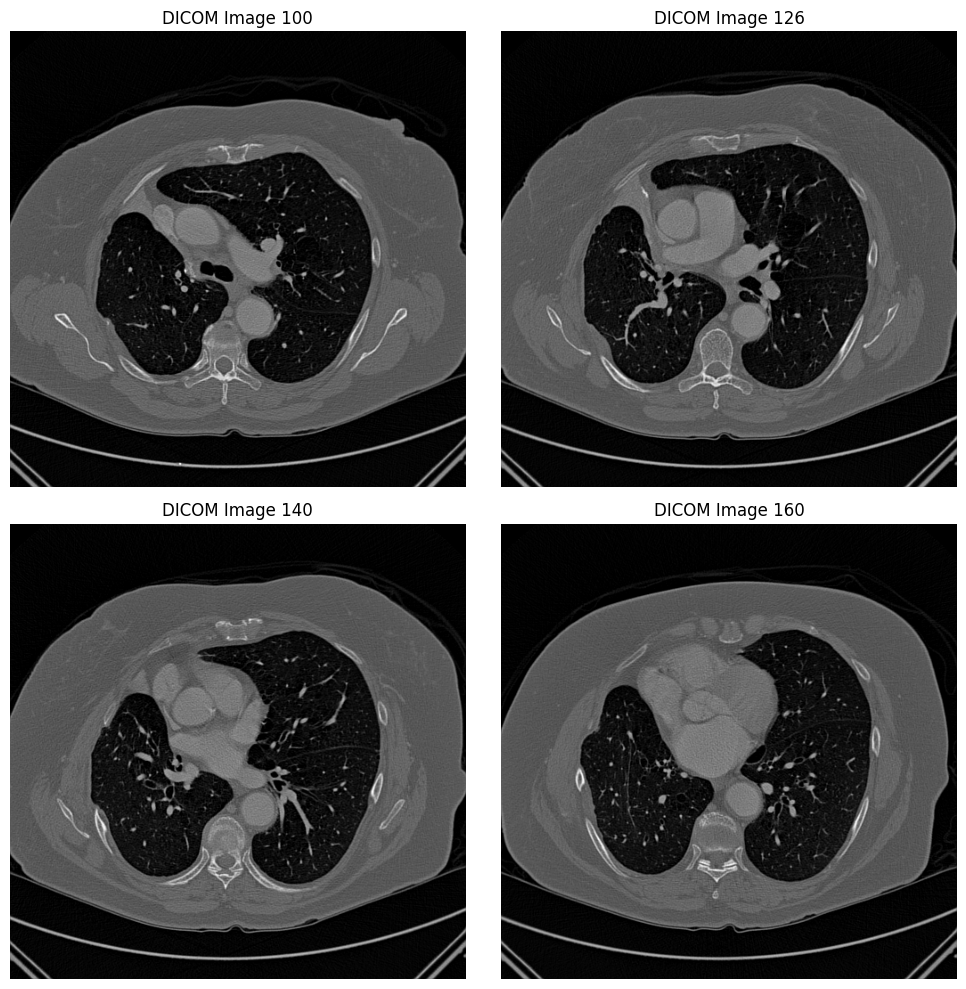

In [ ]:
pixel_arrays = [pixel_array_1, pixel_array_2, pixel_array_3, pixel_array_4]
titles = ['DICOM Image 100', 'DICOM Image 126', 'DICOM Image 140', 'DICOM Image 160']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate over the pixel arrays and axes
for i, ax in enumerate(axes.flat):
    ax.imshow(pixel_arrays[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')  # Optional: Turn off axis labels for a cleaner look

# Adjust layout
plt.tight_layout()
plt.show()

# Metadata
### After reading the file with **pydicom**, you are creating a **FileDataset** object.

From this object, you can access the metadata of the file by calling it like:

---

## 1. Patient Information
- `dicom_file.PatientName`: Retrieves patient's name.
- `dicom_file.PatientID`: Unique identifier for the patient.
- `dicom_file.PatientBirthDate`: Birth date of the patient.
- `dicom_file.PatientSex`: Gender of the patient.

---

## 2. Study Information
- `dicom_file.StudyInstanceUID`: Unique identifier for the study.
- `dicom_file.StudyDate`: Date the study was performed.
- `dicom_file.StudyTime`: Time the study was performed.
- `dicom_file.StudyDescription`: Description of the study.

---

## 3. Series Information
- `dicom_file.SeriesInstanceUID`: Unique identifier for the series within a study.
- `dicom_file.SeriesNumber`: Number indicating the series within a study.
- `dicom_file.SeriesDescription`: Description of the series.
- `dicom_file.Modality`: Type of imaging modality used (e.g., CT, MR, US).

---

## 4. Image Information
- `dicom_file.SOPInstanceUID`: Unique identifier for the specific image or object.
- `dicom_file.InstanceNumber`: Number indicating the order of the image within the series.
- `dicom_file.ImagePositionPatient`: Position of the image in the patient coordinate system (x, y, z).
- `dicom_file.ImageOrientationPatient`: Orientation of the image relative to the patient.
- `dicom_file.PixelSpacing`: Spacing between pixels (in mm).
- `dicom_file.SliceThickness`: Thickness of the slice (in mm).
- `dicom_file.SliceLocation`: Location of the slice along the patient axis.

---

## 5. Equipment Information
- `dicom_file.Manufacturer`: Name of the equipment manufacturer.
- `dicom_file.ManufacturerModelName`: Model of the equipment used.
- `dicom_file.InstitutionName`: Name of the institution where the study was conducted.
- `dicom_file.StationName`: Name of the station performing the scan.

---

## 6. Acquisition Information
- `dicom_file.KVP`: Peak kilovoltage applied (relevant for X-ray modalities).
- `dicom_file.AcquisitionDate`: Date the image was acquired.
- `dicom_file.AcquisitionTime`: Time the image was acquired.

---

## 7. Pixel Data and Dimensions
- `dicom_file.Rows`: Number of rows in the image matrix.
- `dicom_file.Columns`: Number of columns in the image matrix.
- `dicom_file.BitsAllocated`: Number of bits allocated per pixel.
- `dicom_file.BitsStored`: Number of bits actually stored per pixel.
- `dicom_file.HighBit`: Most significant bit for pixel values.
- `dicom_file.PhotometricInterpretation`: Type of pixel representation (e.g., MONOCHROME2, RGB).

---

## 8. Radiology-Specific Metadata
- `dicom_file.ContrastBolusAgent`: Type of contrast agent used.
- `dicom_file.BodyPartExamined`: Body part being imaged.
- `dicom_file.ViewPosition`: View orientation (e.g., AP, PA, Lateral). This data does not contain this info, but it is important to know that it could be there.

---

## 9. Additional Identifiers
- `dicom_file.AccessionNumber`: Identifier used to link to the study in the RIS (Radiology Information System).
- `dicom_file.ReferringPhysicianName`: Name of the physician who referred the patient.


# Get the Numbers!

To obtain the required numbers and escape this room, you must answer these questions based on the metadata.

Since we are working with different slices of the same patient, you can use any of the pydicom.dcmread objects to access the various attributes.


**Example**

Question: What is the slice thickness of the images?

For this, we will use the attribute `.SliceThickness`, which retrieves a float number.

In [ ]:
#Answer
thickness = int(dicom_sl_1.SliceThickness)
print(f"Slice thickness: {thickness}")

Slice thickness: 1


# Questions

**1.** What is the final digit of the equipment model used here?
- hint: This is the last character of the string

In [ ]:
equipment = dicom_sl_1.ManufacturerModelName[-1]
print(f"Equipment used: {equipment}")

Equipment used: 4


**2)** What is the **day** on which the study was conducted?
* Hint: To extract the exact day from the date, use the following steps:

    a) Read the correct attribute regarding **study dates**
    
    b) Convert the date string into a datetime object using the pd.to_datetime() function:
    
       variable_datetime = pd.to_datetime(string, format="%Y%m%d")
       
    c) The resulting object contains attributes for the year, month, and day.

    year = variable_datetime.year


In [ ]:
study_date = dicom_sl_1.StudyDate
date = pd.to_datetime(study_date, format ="%Y%m%d")
year = date.year
month = date.month
day = date.day
print(f"Date of the study {day}")

Date of the study 3


**3.** What is the patient's sex?

-Rule: The number obtained here, should be encoded as follows:  'F' = 1 and 'M' = 0

In [ ]:
sex = 1 if dicom_sl_1.PatientSex == 'F' else 0
print(f"Sex: {sex}")

Sex: 1


# What is the final code?
Ask the person in charge of this room if the final code you got is correct in order to open the chest.

Merge the previous information with **int** format and that will be the password for the next stage

In [ ]:
print(f"Final code would be: {str(equipment) + str(day)  + str(sex)}")

Final code would be: 431
